In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from tensorflow.keras import Sequential,Input, Model
from tensorflow.keras.layers import Embedding,Dense,TimeDistributed,LSTM,GRU,Bidirectional,SimpleRNN,RNN

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Tabular Playground Series/Binary Classification with a Software Defects Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir(path)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Tabular Playground Series/Binary Classification with a Software Defects Dataset'

In [4]:
train = pd.read_csv('train.csv')


In [5]:
test = pd.read_csv('test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [7]:
trainCopy = train.copy()

In [8]:
trainCopy.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [9]:
train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [10]:
#Checking for outliers
train.describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
90%,91585.800000,80.000000,12.000000,7.000000,7.000000,205.000000,1148.860000,0.240000,28.750000,49.240000,...,1726.400000,48.000000,5.000000,9.000000,0.000000,20.000000,31.000000,121.000000,83.000000,22.000000
95%,96673.900000,113.000000,17.000000,11.000000,10.000000,312.000000,1812.591000,0.320000,37.730000,61.900000,...,3623.420000,71.000000,9.000000,13.000000,1.000000,23.000000,42.000000,183.000000,129.000000,33.000000
99%,100744.380000,226.000000,33.380000,23.000000,19.000000,756.000000,5033.790000,0.500000,62.370000,107.690000,...,14586.050000,152.000000,25.000000,28.000000,4.000000,27.000000,76.000000,459.000000,306.000000,65.000000


In [11]:
train['defects'].value_counts()

False    78699
True     23064
Name: defects, dtype: int64

In [12]:
### data is imabalnced

In [13]:
test.shape

(67842, 22)

In [14]:
train.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [15]:
#train['defects'] = train['defects'].apply(lambda x : 1 if x == True else 0)

In [16]:
train['defects'].value_counts()

False    78699
True     23064
Name: defects, dtype: int64

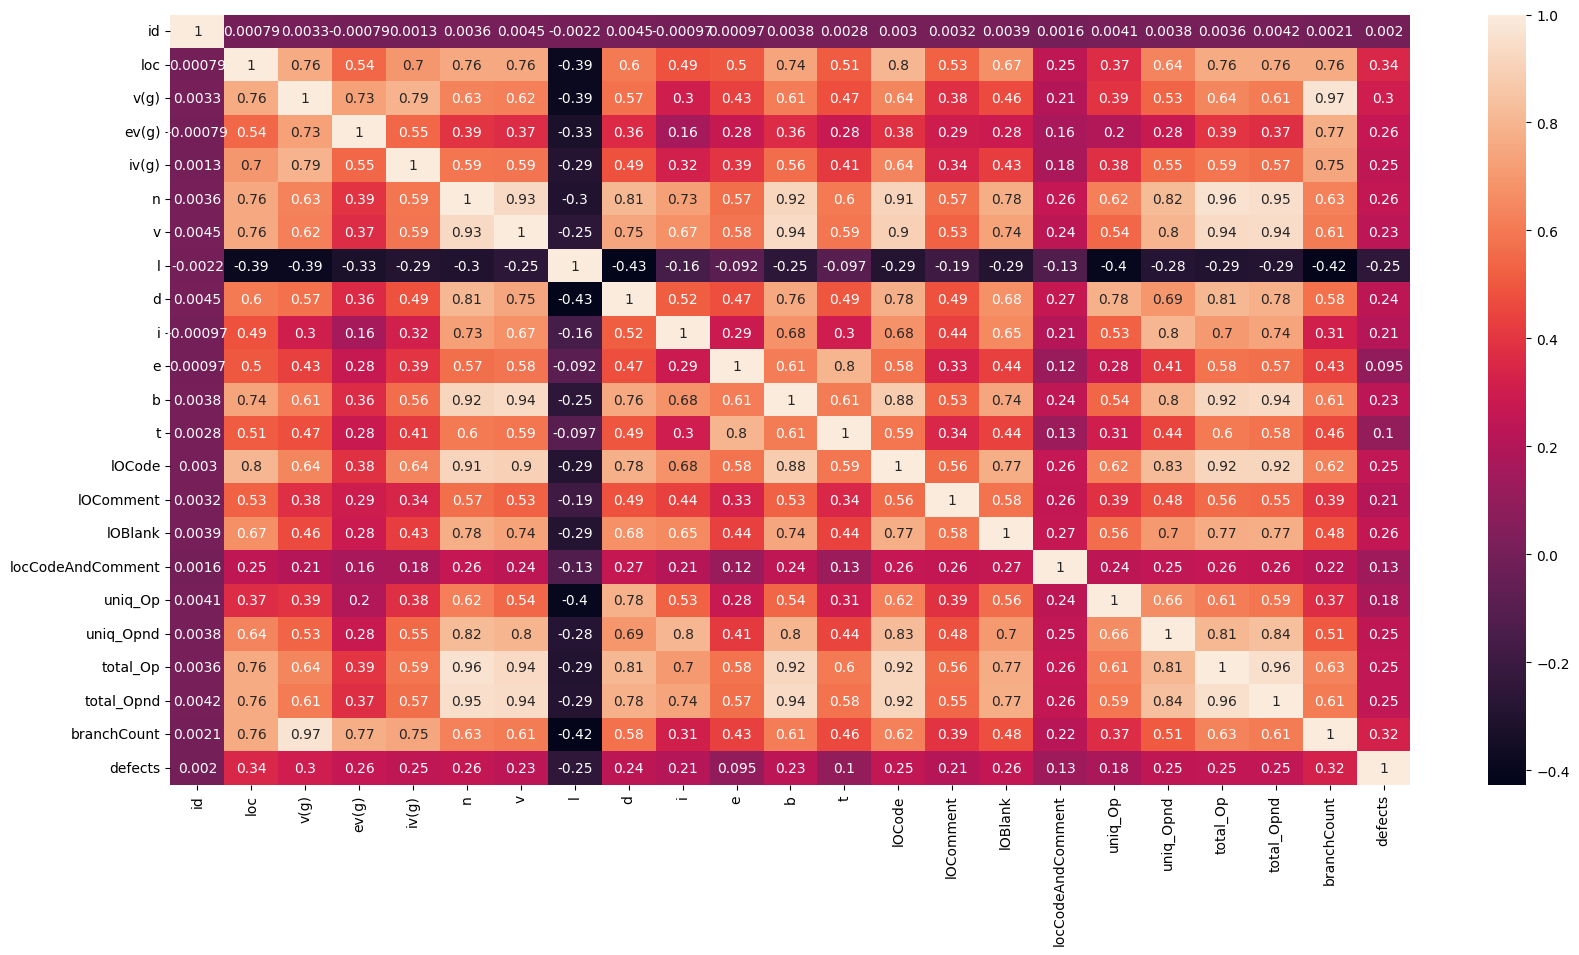

In [17]:
#Checking for multicollinearity
plt.figure(figsize= (20,10))
sns.heatmap(train.corr(),annot=True);

In [18]:
#splitting into train-test
X = train.drop(['defects'],axis =1)
y = train['defects']

In [19]:
X.shape

(101763, 22)

In [20]:
y.shape

(101763,)

In [21]:
X = X.drop(['id'],axis =1)

In [22]:
# #Slpitting into train-test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over,y_train_over = oversample.fit_resample(X,y)



In [24]:
#feature standardization
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X__train_scaled = scaler.fit_transform(X_train_over)

In [25]:
X_test_scaled = scaler.transform(X_test)

# Modelling with ANN

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = X__train_scaled.shape[1]))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [28]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics= ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11137 (43.50 KB)
Trainable params: 11137 (43.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X__train_scaled,y_train_over,epochs=10,batch_size=16,verbose =1,validation_split=0.1,shuffle = True)

Epoch 1/10
8854/8854 [==============================] - 49s 5ms/step - loss: 0.5542 - accuracy: 0.7299 - val_loss: 0.6835 - val_accuracy: 0.6213
Epoch 2/10
8854/8854 [==============================] - 32s 4ms/step - loss: 0.5501 - accuracy: 0.7317 - val_loss: 0.6506 - val_accuracy: 0.6291
Epoch 3/10
8854/8854 [==============================] - 34s 4ms/step - loss: 0.5489 - accuracy: 0.7329 - val_loss: 0.6117 - val_accuracy: 0.6147
Epoch 4/10
8854/8854 [==============================] - 33s 4ms/step - loss: 0.5481 - accuracy: 0.7328 - val_loss: 0.5853 - val_accuracy: 0.6417
Epoch 5/10
8854/8854 [==============================] - 32s 4ms/step - loss: 0.5477 - accuracy: 0.7327 - val_loss: 0.6352 - val_accuracy: 0.6367
Epoch 6/10
8854/8854 [==============================] - 32s 4ms/step - loss: 0.5472 - accuracy: 0.7326 - val_loss: 0.6708 - val_accuracy: 0.6212
Epoch 7/10
8854/8854 [==============================] - 34s 4ms/step - loss: 0.5468 - accuracy: 0.7336 - val_loss: 0.6507 - val_ac

In [31]:
y_pred = model.predict(X_test_scaled)

637/637 [==============================] - 1s 1ms/step


In [32]:
type(X_test_scaled)


numpy.ndarray

In [33]:
y_pred

array([[0.31352025],
       [0.46960655],
       [0.5617389 ],
       ...,
       [0.756795  ],
       [0.30341673],
       [0.8812049 ]], dtype=float32)

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7904664185353273

In [35]:
#y_pred = (y_pred > 0.5).astype(int)

In [36]:
y_pred

array([[0.31352025],
       [0.46960655],
       [0.5617389 ],
       ...,
       [0.756795  ],
       [0.30341673],
       [0.8812049 ]], dtype=float32)

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7904664185353273

# Modelling with LSTM

In [38]:


model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(128,input_shape = (X__train_scaled.shape[1],1),return_sequences=True)) # # return_sequences=True means stacked LSTM cells-used to learn deeper features
model2.add(tf.keras.layers.LSTM(128,return_sequences = True))
model2.add(tf.keras.layers.LSTM(128))

model2.add(tf.keras.layers.Dense(50))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))


In [39]:
model2.compile(optimizer='adam',loss ='binary_crossentropy',metrics= ['accuracy'])

In [40]:
model2.fit(X__train_scaled,y_train_over,epochs=10,batch_size=16,verbose =1,validation_split=0.1,shuffle = True)

Epoch 1/10
8854/8854 [==============================] - 102s 11ms/step - loss: 0.5717 - accuracy: 0.7190 - val_loss: 1.2034 - val_accuracy: 0.3020
Epoch 2/10
8854/8854 [==============================] - 97s 11ms/step - loss: 0.5636 - accuracy: 0.7251 - val_loss: 5.0230 - val_accuracy: 0.0000e+00
Epoch 3/10
8854/8854 [==============================] - 96s 11ms/step - loss: 0.5621 - accuracy: 0.7257 - val_loss: 10.8131 - val_accuracy: 0.0000e+00
Epoch 4/10
8854/8854 [==============================] - 93s 11ms/step - loss: 0.5620 - accuracy: 0.7260 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 5/10
8854/8854 [==============================] - 94s 11ms/step - loss: 0.5609 - accuracy: 0.7259 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 6/10
8854/8854 [==============================] - 95s 11ms/step - loss: 0.5595 - accuracy: 0.7275 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 7/10
8854/8854 [==============================] - 93s 10ms/step - loss: 0.5596 - accuracy: 0.7265 - val_loss

In [41]:
y_pred = model2.predict(X_test_scaled)

637/637 [==============================] - 3s 4ms/step


In [42]:
# Model perforramce with LSTM
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7848997984805095

In [43]:
# Evaluatiion on test data now
test.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [44]:
test_copy = test.copy()

In [45]:
test = test.drop(['id'],axis = 1)

In [46]:
test_scaled = scaler.transform(test)

In [47]:
y_pred_test = model.predict(test_scaled)

2121/2121 [==============================] - 4s 2ms/step


In [48]:
y_pred_test.shape

(67842, 1)

In [49]:
#submission data
submission = pd.DataFrame({'id':test_copy['id'],'defects':y_pred_test.flatten()})

In [50]:
submission.head()

,id,defects
0,101763,0.469291
1,101764,0.383992
2,101765,0.838543
3,101766,0.753989
4,101767,0.322933


In [51]:
submission.to_csv('submission.csv',index = False)